# Life Expectancy predictions

### Imports

In [159]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import CosineDecay
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt

### Dataframe management and merging

In [164]:
# Importing the inputs
X = pd.read_csv("datasets/world-data-2023.csv")

drop_col = ["Abbreviation","Calling Code", "Capital/Major City", "Currency-Code", "Official language", "Largest city", "Latitude", "Longitude", "Total tax rate", "Tax revenue (%)", "Unemployment rate", "CPI", "CPI Change (%)", "Land Area(Km2)", "Agricultural Land( %)", "Life expectancy", "Armed Forces size"]
drop_col_2 = ["Density\n(P/Km2)", "Forested Area (%)", "Urban_population", "Population", "Gasoline Price", "GDP", "Population: Labor force participation (%)", "Out of pocket health expenditure", "Fertility Rate", "Birth Rate", "Minimum wage"]

X = X.dropna().drop(columns = drop_col)

# Importing the output labels
Y = pd.read_csv("datasets/LE.csv")
Y = Y[["Country", "Life Expectancy at Birth (2021)"]]

# Merging datasets, where no NaN values exist
dataset = pd.merge(X, Y, on = "Country")

# Dropping Country value on the final output
dataset = dataset.drop(columns = "Country")
display(dataset)

,Density\n(P/Km2),Birth Rate,Co2-Emissions,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Urban_population,Life Expectancy at Birth (2021)
0,60,32.49,"8,672",4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,638.0,$0.43,78.40%,0.28,"38,041,754",48.90%,"9,797,273",61.9824
1,105,11.78,"4,536",1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,15.0,$1.12,56.90%,1.20,"2,854,191",55.70%,"1,747,593",76.4626
2,18,24.28,"150,006",3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,112.0,$0.95,28.10%,1.72,"43,053,054",41.20%,"31,510,100",76.3767
3,26,40.73,"34,693",5.52,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,241.0,$0.71,33.40%,0.21,"31,825,295",77.50%,"21,061,025",61.6434
4,17,17.02,"201,348",2.26,9.80%,$1.10,"$449,663,446,954",109.70%,90.00%,8.8,39.0,$3.35,17.60%,3.96,"44,938,712",61.30%,"41,339,571",75.3899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,229,38.14,"5,680",4.96,9.70%,$0.94,"$34,387,229,486",102.70%,4.80%,33.8,375.0,$0.01,40.50%,0.17,"44,269,594",70.30%,"10,784,516",62.7048
94,75,8.70,"202,250",1.30,16.70%,$0.83,"$153,781,069,118",99.00%,82.70%,7.5,19.0,$0.84,47.80%,2.99,"44,385,155",54.20%,"30,835,699",71.6240
95,281,11.00,"379,025",1.68,13.10%,$1.46,"$2,827,113,184,696",101.20%,60.00%,3.6,7.0,$10.13,14.80%,2.81,"66,834,405",62.80%,"55,908,316",80.7422
96,20,13.86,"6,766",1.97,10.70%,$1.50,"$56,045,912,952",108.50%,63.10%,6.4,17.0,$1.66,16.20%,5.05,"3,461,734",64.00%,"3,303,394",75.4356


### Additional filtering

In [165]:
# Removing '%', ',', '$' characters from the .csv file
dataset = dataset.replace({"$": '', ',':'', '%': ''}, regex=True)

display(dataset)

# Saving to a .csv
# dataset.to_csv("training/input.csv", index=False, header=False)
dataset.to_csv("training/input_w_header_2.csv", index=False, header=True)

,Density\n(P/Km2),Birth Rate,Co2-Emissions,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Urban_population,Life Expectancy at Birth (2021)
0,60,32.49,8672,4.47,2.10,$0.70,$19101353833,104.00,9.70,47.9,638.0,$0.43,78.40,0.28,38041754,48.90,9797273,61.9824
1,105,11.78,4536,1.62,28.10,$1.36,$15278077447,107.00,55.00,7.8,15.0,$1.12,56.90,1.20,2854191,55.70,1747593,76.4626
2,18,24.28,150006,3.02,0.80,$0.28,$169988236398,109.90,51.40,20.1,112.0,$0.95,28.10,1.72,43053054,41.20,31510100,76.3767
3,26,40.73,34693,5.52,46.30,$0.97,$94635415870,113.50,9.30,51.6,241.0,$0.71,33.40,0.21,31825295,77.50,21061025,61.6434
4,17,17.02,201348,2.26,9.80,$1.10,$449663446954,109.70,90.00,8.8,39.0,$3.35,17.60,3.96,44938712,61.30,41339571,75.3899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,229,38.14,5680,4.96,9.70,$0.94,$34387229486,102.70,4.80,33.8,375.0,$0.01,40.50,0.17,44269594,70.30,10784516,62.7048
94,75,8.70,202250,1.30,16.70,$0.83,$153781069118,99.00,82.70,7.5,19.0,$0.84,47.80,2.99,44385155,54.20,30835699,71.6240
95,281,11.00,379025,1.68,13.10,$1.46,$2827113184696,101.20,60.00,3.6,7.0,$10.13,14.80,2.81,66834405,62.80,55908316,80.7422
96,20,13.86,6766,1.97,10.70,$1.50,$56045912952,108.50,63.10,6.4,17.0,$1.66,16.20,5.05,3461734,64.00,3303394,75.4356


### Principal component analysis

In [147]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [167]:
df = pd.read_csv("training/input_w_header_2.csv")
df = df.drop(df.columns[-1], axis=1)

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Calculate PCA
pca = PCA(n_components=17)
pca.fit(X_scaled)

# Calculate eigenspaces
eigenvectors = pca.components_
explained_variance = pca.explained_variance_ratio_

# Rank eigenspaces based on corresponding variance
most_important_eigenvectors = eigenvectors[:3]

# Print the most important eigenvectors and explained variance
print("Explained Variance Ratios:", explained_variance)
print("\nMost Important Eigenvectors (Principal Components):\n")
for i, vec in enumerate(most_important_eigenvectors, 1):
    print(f"Eigenvector {i} (PC{i}):\n{vec}\n")
    
components = pca.components_

feature_importance = np.sum(np.abs(components), axis=0)

# Create a DataFrame for ranking
importance_df = pd.DataFrame({
    'Feature': df.columns,
    'Importance': feature_importance
})

# Rank the features by their importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked features
print(importance_df)

Explained Variance Ratios: [0.32719557 0.21638588 0.10663019 0.07220144 0.06868559 0.04820174
 0.04013035 0.03257804 0.02486009 0.01776002 0.01425289 0.01329544
 0.01217689 0.00393169 0.00081973 0.0004932  0.00040124]

Most Important Eigenvectors (Principal Components):

Eigenvector 1 (PC1):
[-0.07073495  0.39982273 -0.08964945  0.38582546 -0.03466641 -0.16687202
 -0.11544078  0.04674171 -0.35535488  0.39402714  0.3538012  -0.26497341
  0.15958517 -0.33836285 -0.03530811  0.10786171 -0.06262848]

Eigenvector 2 (PC2):
[ 0.04407392  0.01799169  0.49560698  0.01900534 -0.04004004 -0.06023921
  0.46975984  0.01379203 -0.05501134  0.05757055  0.04629224 -0.07379393
  0.07680362 -0.09537329  0.48609698  0.01470097  0.51011708]

Eigenvector 3 (PC3):
[-0.22426851  0.06040906  0.05119883  0.05918878  0.51035823  0.23131931
  0.0975005   0.34672577 -0.04141703  0.01610617  0.05170036  0.17449567
 -0.48431599 -0.07947483 -0.02591698  0.46828811  0.01704036]

                                      

### Imports for neural networks

In [70]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import CosineDecay

import matplotlib.pyplot as plt

In [111]:
# Loading the dataset
df = pd.read_csv('training/input.csv')

# Slicing the inputs and the outputs
X = df.iloc[:, :6].values
y = df.iloc[:, 6].values

# Train, test, validation split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Regularization

In [112]:
# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=1000,
    restore_best_weights=True
)

# Cosine annealing - not used in final setup
initial_learning_rate = 0.01
cosine_decay = CosineDecay(
    initial_learning_rate=initial_learning_rate, 
    decay_steps=10,  # Number of steps for a full cosine cycle
    alpha=0.01       # Minimum learning rate at the end of annealing
)

### Model compiling 

In [113]:
# Model building
model = Sequential()

model.add(Dense(units=500, activation='relu', input_shape=(6,)))
model.add(Dropout(0.1))
model.add(Dense(units=250, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.1))

# Output layer
model.add(Dense(units=1))

# Compiling
optimizer = tf.keras.optimizers.Adam(learning_rate=cosine_decay)  # Use cosine decay with Adam optimizer
model.compile(optimizer=optimizer, loss='mean_squared_error')

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Model fitting

In [ ]:
history = model.fit(
    X_train, y_train, 
    epochs=5000, 
    batch_size=10, 
    validation_data=(X_val, y_val), 
    callbacks=[early_stopping],
    verbose=1
)

In [116]:
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {mse}")

# Model predictions
predictions = model.predict(X_test[:8])
print(np.vstack((y_test[:8], predictions.T)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.0091
Mean Squared Error on Test Set: 14.009109497070312
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[78.7154     70.2617     83.6978     82.4988     75.4356     70.4697
  61.5763     80.6904    ]
 [74.37031555 70.10800171 78.65232849 79.26052856 72.22695923 73.1746521
  63.94701385 77.27355194]]


### Model evaluation

In [122]:
def plot_training_history(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_loss) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(epochs[1:500], train_loss[1:500], label='Training Loss')
    plt.plot(epochs[1:500], val_loss[1:500], label='Validation Loss')
    
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)
    plt.show()

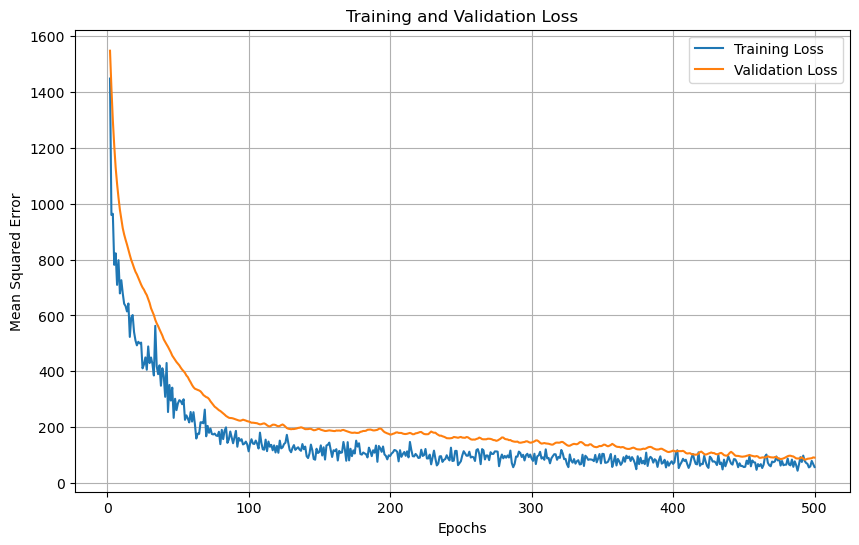

In [123]:
plot_training_history(history)

### Saving the model

In [124]:
model.save("training/model.keras")

In [ ]:
##### Inlude this in the web version #####

# Imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import CosineDecay
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt

# Loading the model
loaded_model = load_model("training/model.keras")       # With the appropriate Path

##########################################

# Now we can make predictions:

# X_test = ???
predictions = loaded_model.predict(X_test)              # Test data should be read in from the sliders

print(np.vstack((y_test, predictions.T)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[78.7154     70.2617     83.6978     82.4988     75.4356     70.4697
  61.5763     80.6904     82.255      72.0431     72.7504     59.821
  77.5804     75.0472     81.0443     76.4626     71.694      82.4513
  70.1229     76.3991    ]
 [71.81258392 58.6414299  70.7194519  80.27270508 77.57242584 81.03716278
  75.78937531 82.2161026  64.03266144 78.39984894 60.73491287 64.88811493
  80.46572113 65.66629791 80.43857574 73.14860535 72.35993958 84.53897858
  69.9802475  61.60586166]]
